General Implementation


--- Detailed Classification Report ---
              precision    recall  f1-score   support

      Benign       0.97      0.96      0.96        71
   Malignant       0.93      0.95      0.94        43

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114

Accuracy: 0.9561


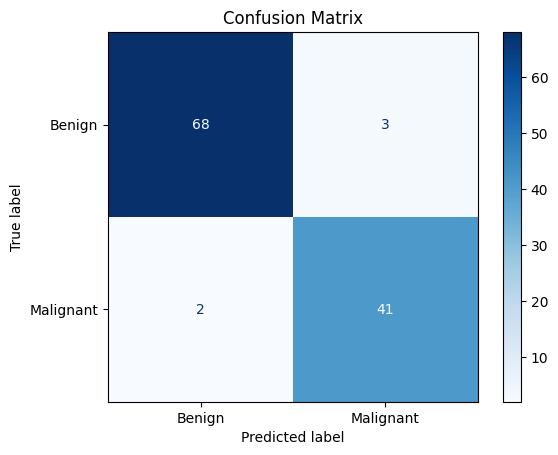

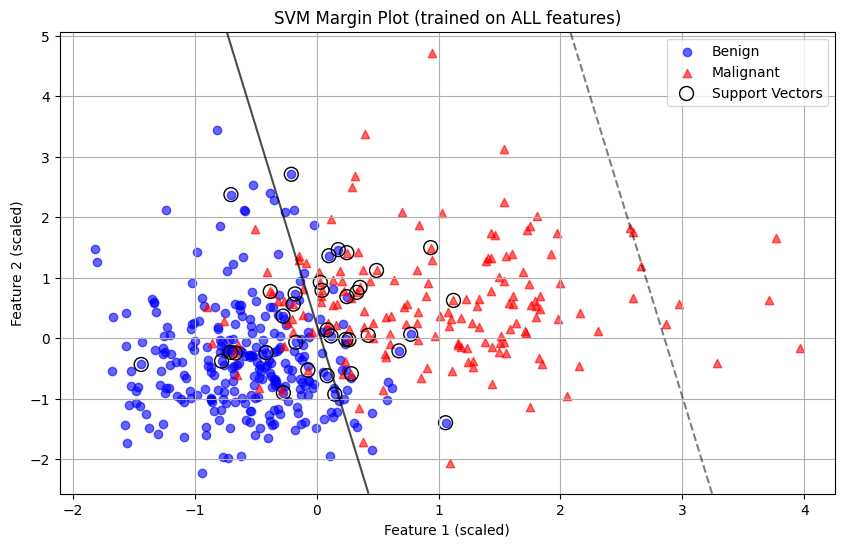

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Load dataset
df = pd.read_csv('cancer.csv')

# Drop non-feature columns (id, unnamed)
df.drop(columns=[col for col in df.columns if 'Unnamed' in col or col == 'id'], inplace=True)

# Map target labels
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Separate X and y
X = df.drop(columns=['diagnosis'])
y = df['diagnosis']

# Handle NaNs properly
X = X.apply(pd.to_numeric, errors='coerce')
X.fillna(X.mean(), inplace=True)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train SVM
svm = SVC(kernel='linear', C=1.0)
svm.fit(X_train_scaled, y_train)

# Predictions
y_pred = svm.predict(X_test_scaled)

# Metrics
print("\n--- Detailed Classification Report ---")
print(classification_report(y_test, y_pred, target_names=['Benign', 'Malignant']))

acc = svm.score(X_test_scaled, y_test)
print(f"Accuracy: {acc:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Benign', 'Malignant'])

# Plot Confusion Matrix
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()

# ---- Final Margin Plot ----
X_vis = X_train_scaled[:, :2]  # Take first 2 features

plt.figure(figsize=(10, 6))
for label, color, marker in zip([0, 1], ['b', 'r'], ['o', '^']):
    plt.scatter(X_vis[y_train == label, 0], X_vis[y_train == label, 1],
                color=color, marker=marker, alpha=0.6,
                label=('Benign' if label == 0 else 'Malignant'))

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 50)
yy = np.linspace(ylim[0], ylim[1], 50)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T

coef = svm.coef_[0][:2]
bias = svm.intercept_[0]
Z = np.dot(xy, coef) + bias
Z = Z.reshape(XX.shape)

ax.contour(XX, YY, Z, colors='k', levels=[0], alpha=0.7, linestyles=['-'])
ax.contour(XX, YY, Z, colors='k', levels=[-1, 1], alpha=0.5, linestyles=['--'])

sv = svm.support_vectors_[:, :2]
ax.scatter(sv[:, 0], sv[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k', label='Support Vectors')

plt.xlabel('Feature 1 (scaled)')
plt.ylabel('Feature 2 (scaled)')
plt.legend()
plt.title('SVM Margin Plot (trained on ALL features)')
plt.grid(True)
plt.show()